In [2]:
import numpy as np
from collections import Counter
from itertools import permutations 
import matplotlib.pyplot as plt


#Read from txt files 
X = np.loadtxt("emails.csv", delimiter="," ,skiprows=1 ,usecols=range(1,3001), dtype=np.float32)
y = np.loadtxt("emails.csv",delimiter="," ,skiprows=1 , usecols=range(3001,3002), dtype=np.float32)




In [3]:
### KNN 
from sklearn.metrics import accuracy_score

def distance (point,X,K): 
    dist =[]
    #print(point)

    for i in range(len(X[:,0])):
        init_dist = np.linalg.norm(point-X[i,:])
        #print(init_dist)
        #for f in range(3000): 
         #   init_dist += (point[f]-X[i,f])**2
        dist.append(init_dist)
    #loc = np.where(dist == np.amin(dist))
    loc = np.argsort(dist)
    x = loc[:K]
    #if len(x)>1: x = x[0]
    return x

def predict(y,loc_min,K): 
    tot = np.sum(y[loc_min])
    if tot > K/2: 
        y = 1 
    else :
        y = 0 
    return y

In [4]:
## cross validiation ~ k = 5 fold 

avg_acc =[]
K =[1,3,5,7,10] 
for m in range(5): 
    acc=[]
    pres=[]
    recall=[]
    for k in range(5): 
        TP =0
        X_test = X[k*1000:(k+1)*1000,:]
        y_test = y[k*1000:(k+1)*1000]
        #X_train = np.delete(X, [k*1000,(k+1)*999], 0)
        #X_train = np.delete(X, [k*1000:(k+1)*1000], 0)
        indices = np.r_[ k*1000:(k+1)*1000:1]
        X_train = np.delete(X, indices, 0)
        y_train = np.delete(y, indices, 0)
        y_pred = np.zeros(1000)
        #print(len(X_test[:,0]))
        #print(len(y_pred))
        #print(len(X_train[:,0]))
        for s in range(len(X_test[:,0])):
            #print(X_test[k,:])
            loc = distance(X_test[s,:],X_train,K[m])
            #print(loc)
            y_pred[s]=predict(y_train,loc,K[m])
            #print(y_pred)
        accuracy_score(y_pred, y_test)
        acc.append(accuracy_score(y_pred, y_test))
        for t in range(1000):
            if y_pred[t]==y_test[t] and y_pred[t]>0:
                TP+=1
        #TP= np.count_nonzero(y_pred==y_test )
        pres.append(TP/np.count_nonzero(y_pred==1))
        recall.append(TP/np.count_nonzero(y_test==1))
        print('Accuracy: ',acc[k])

        print('prescion: ',pres[k])
        print('recall: ',recall[k])

    print("Avg. Accuracy",np.mean(acc))
    avg_acc.append(np.mean(acc))

Accuracy:  0.825
prescion:  0.6536312849162011
recall:  0.8210526315789474
Accuracy:  0.855
prescion:  0.6896551724137931
recall:  0.8664259927797834
Accuracy:  0.863
prescion:  0.7220543806646526
recall:  0.8415492957746479
Accuracy:  0.854
prescion:  0.7215568862275449
recall:  0.8197278911564626
Accuracy:  0.775
prescion:  0.6051948051948052
recall:  0.761437908496732
Avg. Accuracy 0.8344000000000001
Accuracy:  0.846
prescion:  0.6784741144414169
recall:  0.8736842105263158
Accuracy:  0.85
prescion:  0.6953846153846154
recall:  0.8158844765342961
Accuracy:  0.856
prescion:  0.71875
recall:  0.8098591549295775
Accuracy:  0.88
prescion:  0.7788461538461539
recall:  0.826530612244898
Accuracy:  0.773
prescion:  0.6070460704607046
recall:  0.7320261437908496
Avg. Accuracy 0.841
Accuracy:  0.837
prescion:  0.6685082872928176
recall:  0.8491228070175438
Accuracy:  0.852
prescion:  0.7100977198697068
recall:  0.7870036101083032
Accuracy:  0.871
prescion:  0.7476038338658147
recall:  0.8239

No handles with labels found to put in legend.


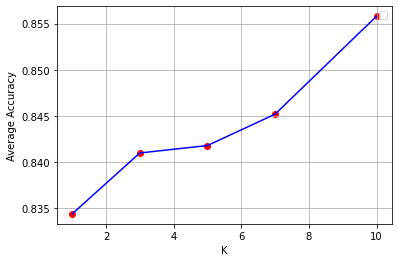

In [5]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()    
plt.scatter(K,avg_acc,c='r')
plt.plot(K,avg_acc,c='b')

plt.legend()
plt.grid()
plt.xlabel("K")
plt.ylabel("Average Accuracy")
plt.savefig("KNN_acc.jpg",dpi=400)
